<center><img src="https://cdn.myportfolio.com/af6b3040-1629-4612-85cf-e8a20ab442de/9232893e-c26f-45d6-ae45-3a97fe7c773f_rw_1200.jpg?h=bf7618b2f7fde3d383c068c250207661" style="width: 800px;"/>

# Capstone Project - Walmart 

### Problem Statement :
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.


#### Lets Start with Problem 

### Project Objective

Retrieve Useful insights from the data and make prediction models to forecast the sales for X number of months/years

### Dataset Information:
    

|Feature | Description|
|-----------|---------|
|Store | Store number|
|Date | Week of Sales|
|Weekly_Sales | Sales for the given store in that week|
|Holiday_Flag | If it is a holiday week|
|Temperature | Temperature on the day of the sale|
|Fuel_Price | Cost of the fuel in the region|
|CPI | Consumer Price Index|
|Unemployment | Unemployment Rate|

### Data Pre_Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
data = pd.read_csv("Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape #shape of dataset

(6435, 8)

In [4]:
data.index #Index

RangeIndex(start=0, stop=6435, step=1)

In [5]:
data['Month'] = pd.DatetimeIndex(data['Date']).month #Taking a separate column month

In [6]:
data['Year'] = pd.DatetimeIndex(data['Date']).year #Taking a separate column year

In [7]:
# data.drop("Date", inplace = True, axis = 1) #Dropping Date column (no need)

In [8]:
data #which we need

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [9]:
data.info() #All info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Month         6435 non-null   int64  
 9   Year          6435 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 502.9+ KB


In [10]:
data.isnull().sum() #Checking null values in the dataset

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

### Observation
NO null Values

In [11]:
data.duplicated().sum()

0

### Observation
NO duplicate Values

In [12]:
# data['Date'] = pd.to_numeric(data['Date'], errors = 'coerce')
# data['Date']

In [13]:
# Target variable and training data

X = data[['Month','Year','Fuel_Price']]
Y = data['Weekly_Sales']

In [14]:
X

,Month,Year,Fuel_Price
0,5,2010,2.572
1,12,2010,2.548
2,2,2010,2.514
3,2,2010,2.561
4,5,2010,2.625
...,...,...,...
6430,9,2012,3.997
6431,5,2012,3.985
6432,12,2012,4.000
6433,10,2012,3.969


In [15]:
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [16]:
# Dividing the data into training and testing (80% training and 20% test data)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size =0.8, test_size = 0.2, random_state=0)

y_test = np.array(y_test) # Converting the test values in the numpy for further formatting in the data

In [17]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape# Training and testing data shapes

((5148, 3), (1287, 3), (5148,), (1287,))

### Choosing th Algorithm for the Project

#### I am choosing the Linear Regression algorithm for the project

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Linear Regression Algorithm Training accuracy of the model :', lin_model.score(X_train, y_train))

Linear Regression Algorithm Training accuracy of the model : 0.007644344245419932


In [20]:
lin_preds = lin_model.predict(X_test)

In [21]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

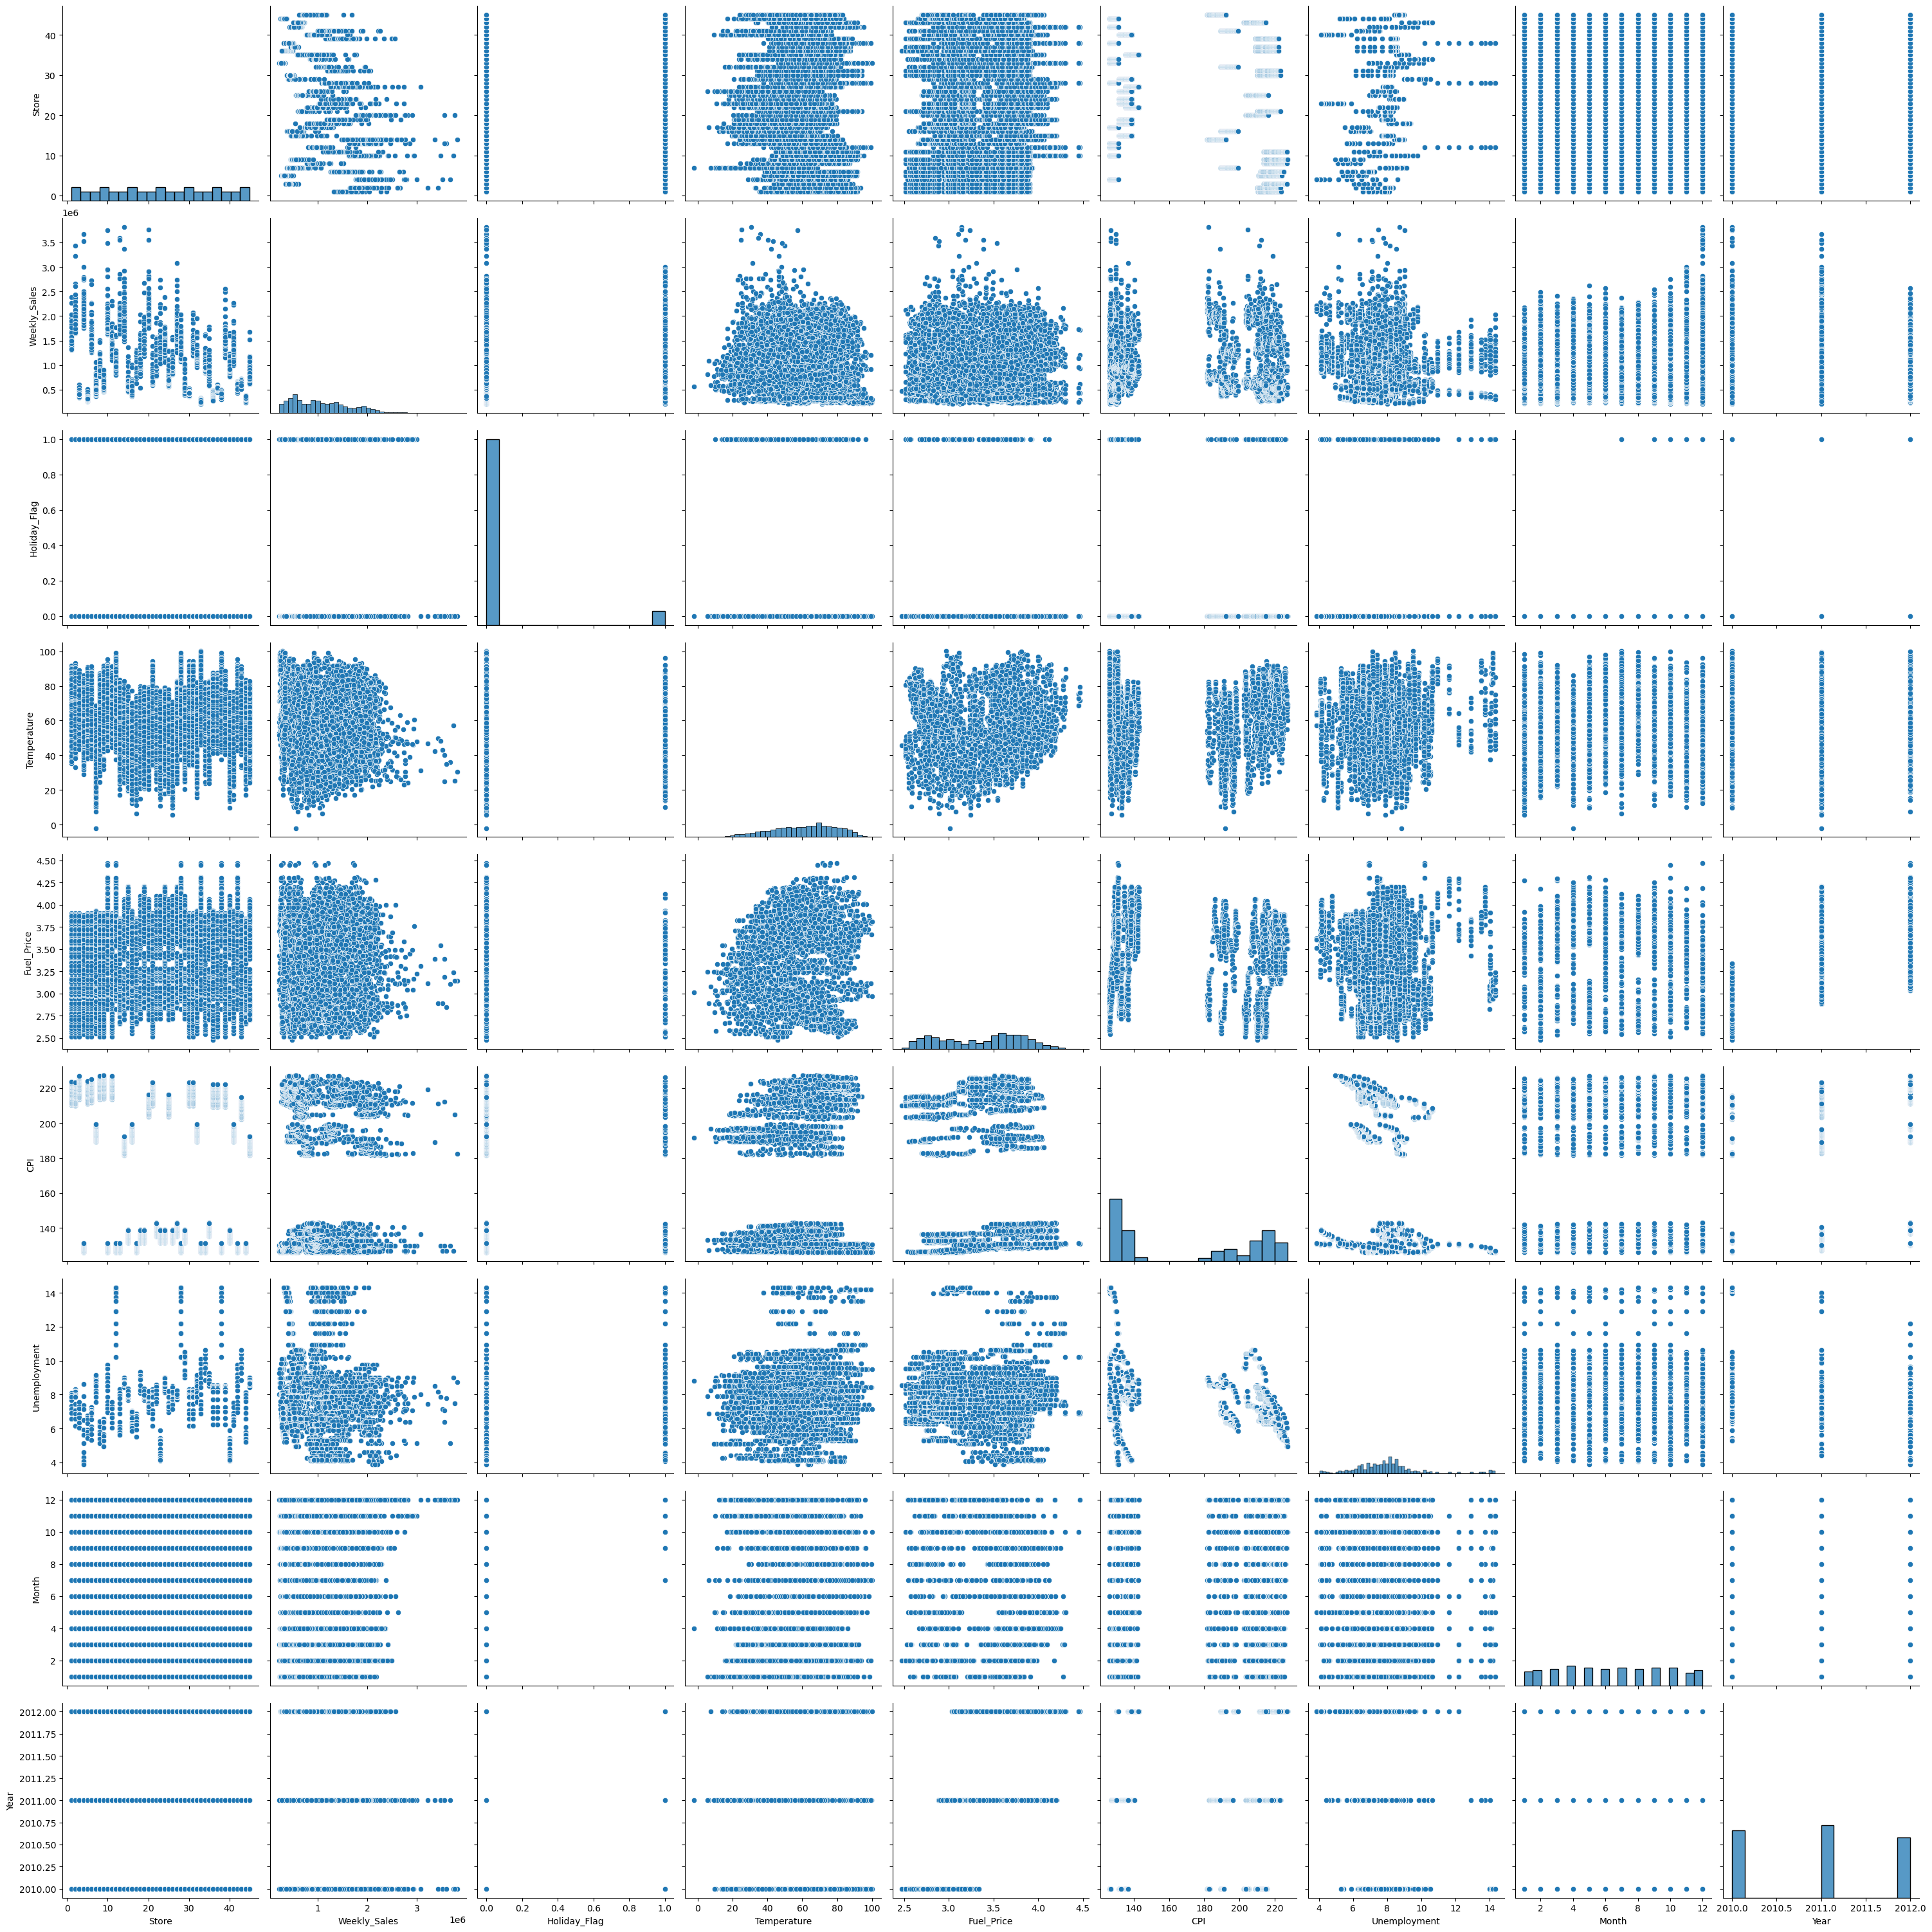

In [22]:
sns.pairplot(data, height = 3.4)
plt.show()

### Motivation and Reasons For Choosing the Algorithm
The main reason of choosing the Linear Regression algorithm is that it is giving the correct prediction results if we compare it with the other algorithms.

### Assumptions

1) One of the most important assumptions is that a linear relationship is said to exist between the dependent and the independent variables.

2) There is no correlation between the consecutive error terms of the time series data.

3) The independent variables shouldn’t be correlated. If multicollinearity exists between the independent variables, it is challenging to predict the outcome of the model.

### Model Evaluation and Techniques

In [23]:
print('MAE of the Linear Regression Algorithm:')
print(mean_absolute_error(y_test, lin_preds))

MAE of the Linear Regression Algorithm:
465143.86516623525


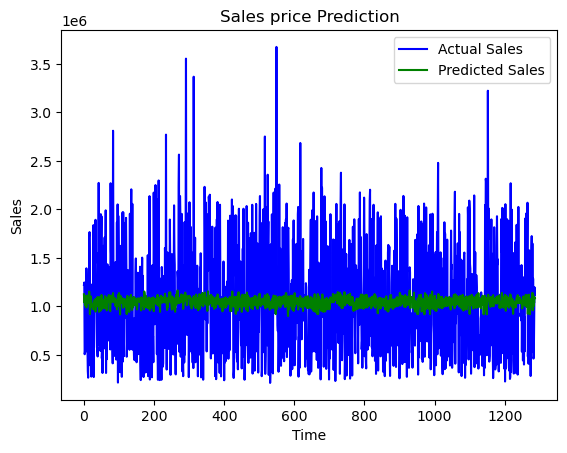

In [24]:
plt.plot(y_test, color = 'blue', label = 'Actual Sales')
plt.plot(lin_preds , color = 'green',label ='Predicted Sales')
plt.title('Sales price Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [25]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lin_preds})
comparison

,Actual,Predicted
0,1220984.94,1.124412e+06
1,1246322.44,1.040607e+06
2,505918.21,1.099948e+06
3,527572.25,1.010806e+06
4,719235.07,1.108698e+06
...,...,...
1282,460945.14,9.979540e+05
1283,484263.25,1.068861e+06
1284,833429.22,1.036037e+06
1285,1197019.39,1.093694e+06


In [26]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

### Inferences for the Same

Linear Regression Inference attempts to model the relationship between two variables by fitting a linear equation to observe data. 

### Future Possibilities of the product

For the future possibilities of the project, we can say that the sales in future can also decrease or increase because these are the predicted results and accuracy is also good but due to some reasons like quality of the products , shortage etc.. you can see some decrease in sales or in weekly sales of the products.

### 2. Save your model for each product.

In [27]:
import pickle

#Save the trained model as a pickle string.
saved_model = pickle.dumps(lin_model)

In [28]:
# Load the pickled model
#lin_from_pickle = pickle.loads(saved_model)

### Some other Problems

1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

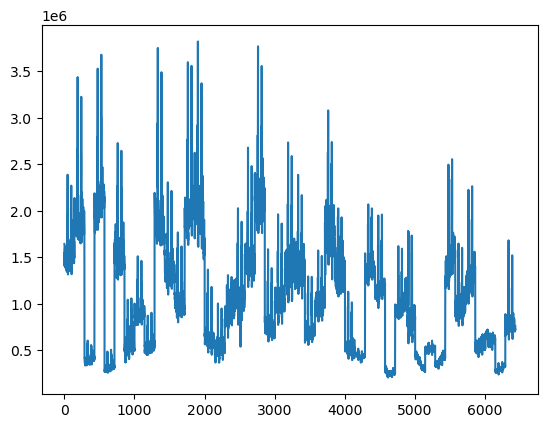

In [29]:
data['Weekly_Sales'].plot()
plt.show()

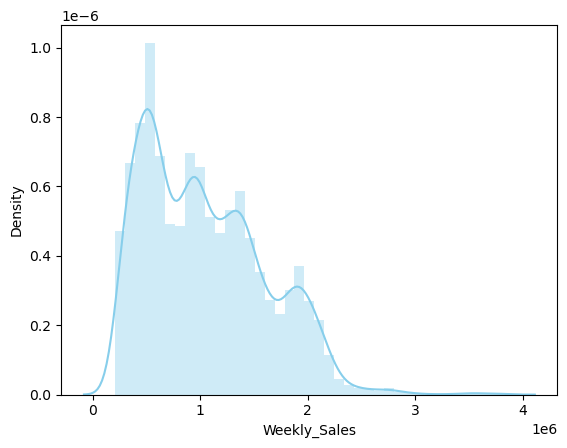

In [30]:
# Plot Histogram plot Sales column

sns.distplot(data['Weekly_Sales'], color='skyblue')
plt.show()

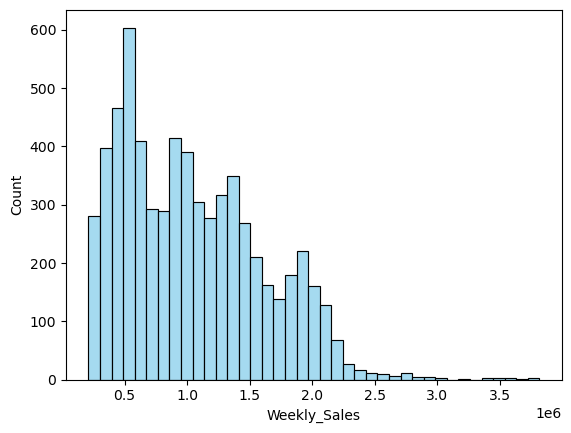

In [31]:
sns.histplot(data=data["Weekly_Sales"] , color="skyblue", label="Increasing of Sales Price (High)")
plt.show()

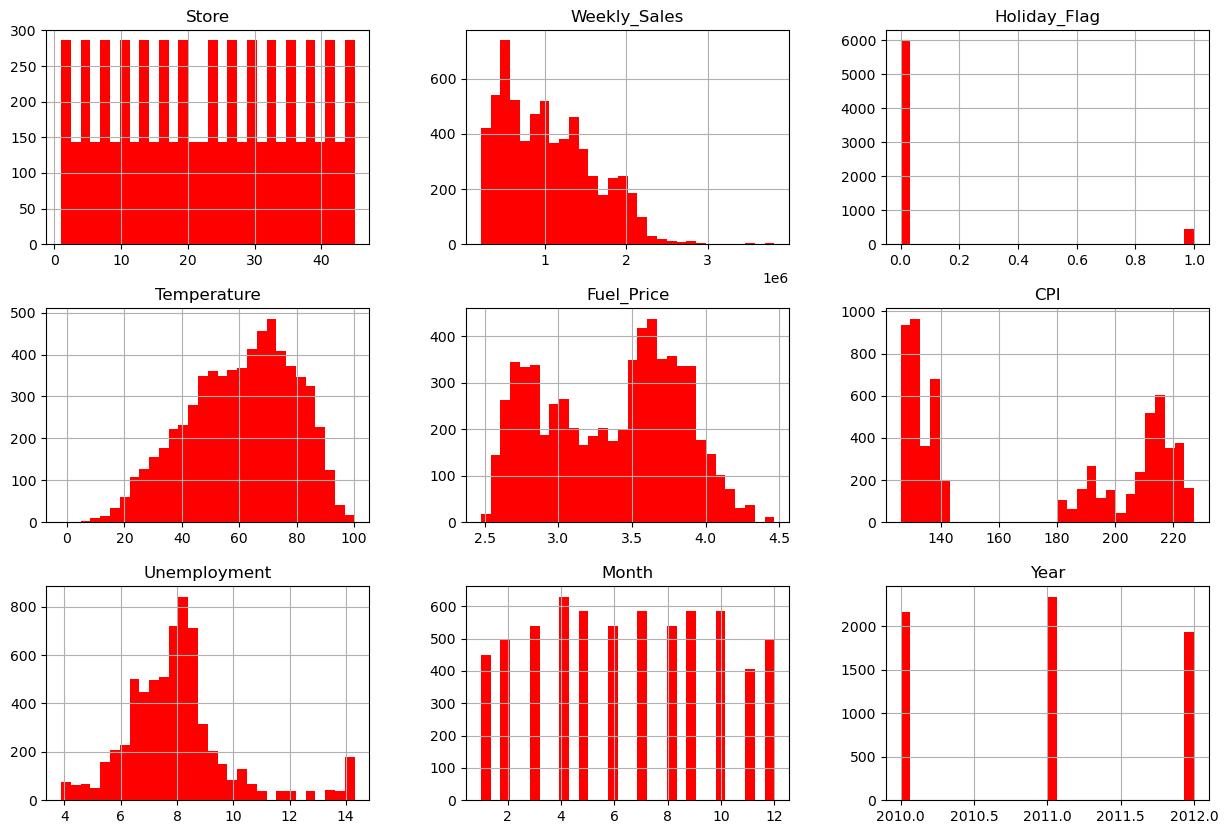

In [32]:
# Histogram

data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

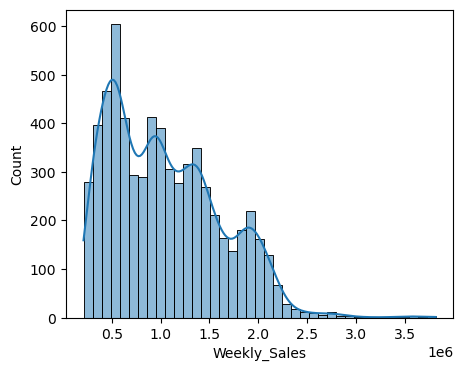

In [33]:
plt.figure(figsize = (5, 4))
sns.histplot(data = data, x = "Weekly_Sales", kde = True)
plt.show()

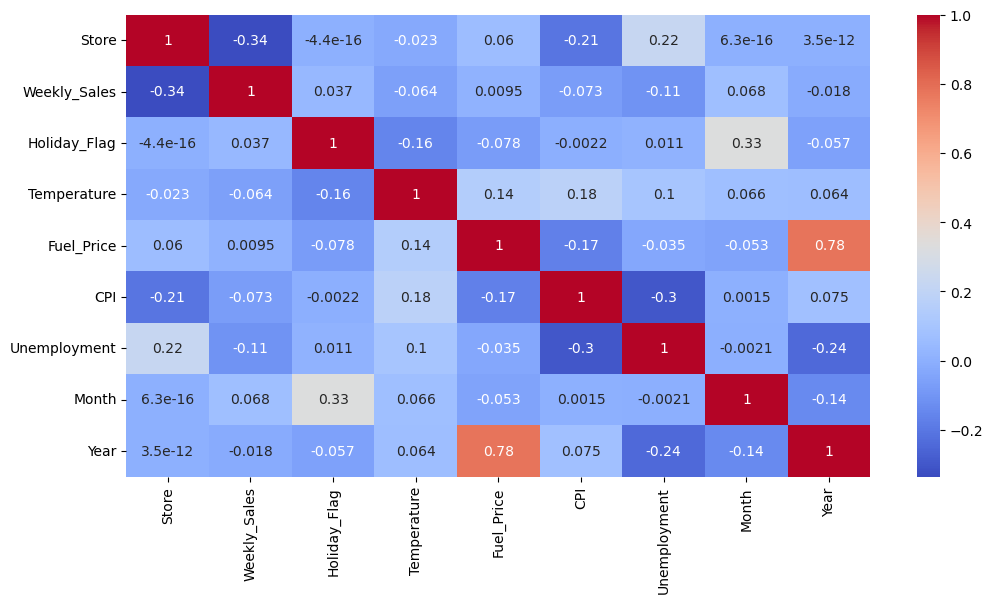

In [34]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.show()

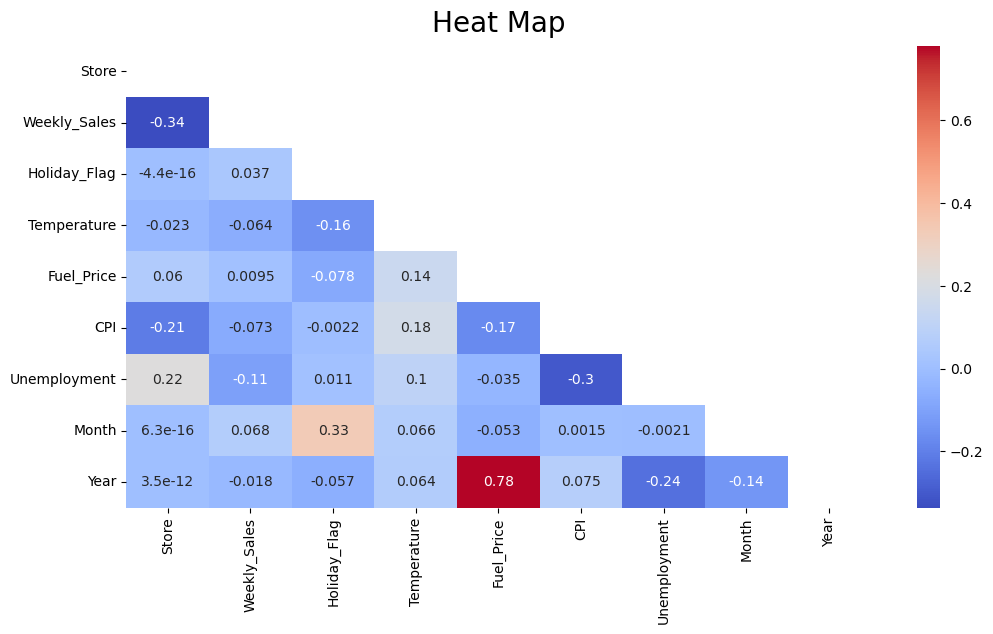

In [35]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data.corr(), dtype=bool)) 
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data.corr(), cmap="coolwarm", annot=True, mask=mask)
heatmap.set_title("Heat Map", fontsize=20, pad=10)
plt.show()

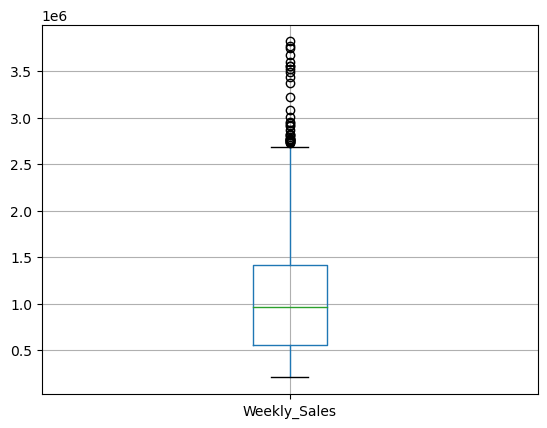

In [36]:
data.boxplot(column = "Weekly_Sales")
plt.show()
# Boxplots

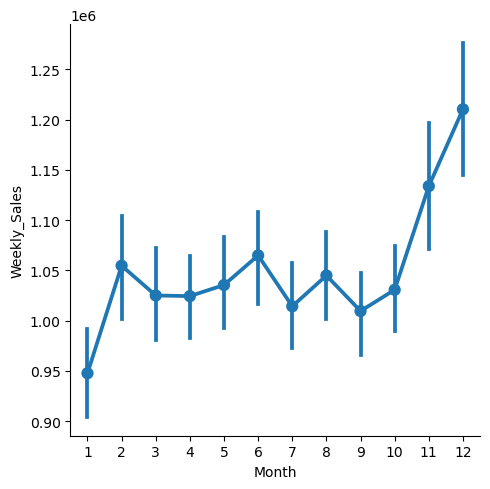

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Change kind to "point" for a Point plot
sns.catplot(data=data, x="Month", y="Weekly_Sales", kind="point") # per store type in cols
plt.show()


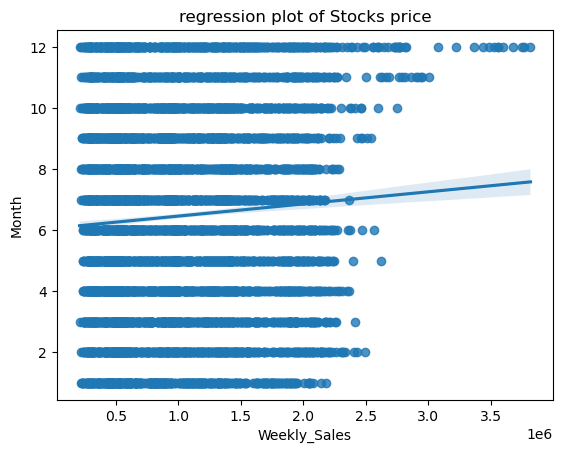

In [38]:
sns.regplot(data = data, x = 'Weekly_Sales',y = 'Month', logistic = False)
plt.title("regression plot of Stocks price")
plt.show()

**2. Forecast the sales for each store for the next 12 weeks.**

In [39]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

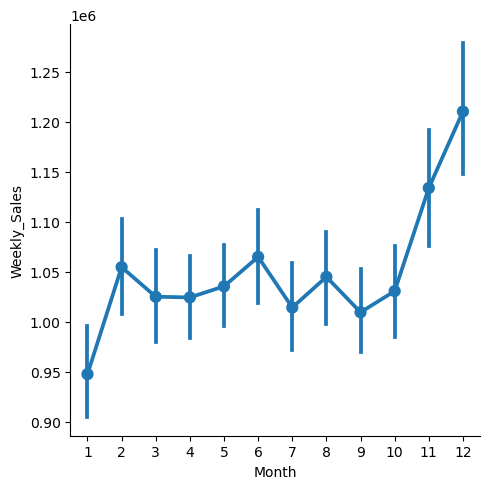

In [40]:
# Sales trend over the months and year
sns.catplot(data=data, x="Month", y="Weekly_Sales", kind="point") # per store type in cols
plt.show()


In [41]:
data['Date'] = pd.to_datetime(data['Date'])

In [42]:
data.set_index('Date', inplace = True)

In [43]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


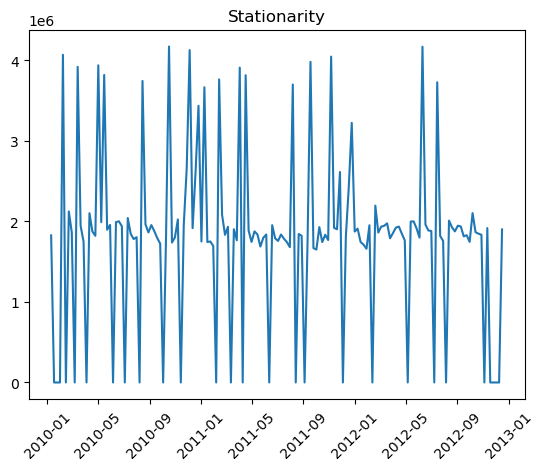

In [44]:
# Data Preparation: input should be float type
data['Weekly_Sales'] = data['Weekly_Sales'] * 1.0
# Assigning one store from each category
sales_a = data[data.Store == 2]['Weekly_Sales']
# Trend
sample = sales_a.resample('W').sum()
plt.plot(sample)
plt.title("Stationarity")
plt.xticks(rotation=45)
plt.show()

In [45]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

In [46]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


In [47]:
data.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,10,2012


In [48]:
data.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month             int64
Year              int64
dtype: object

In [49]:
y= data['Weekly_Sales']

In [50]:
# Checking and updating the ndim

data.ndim

2

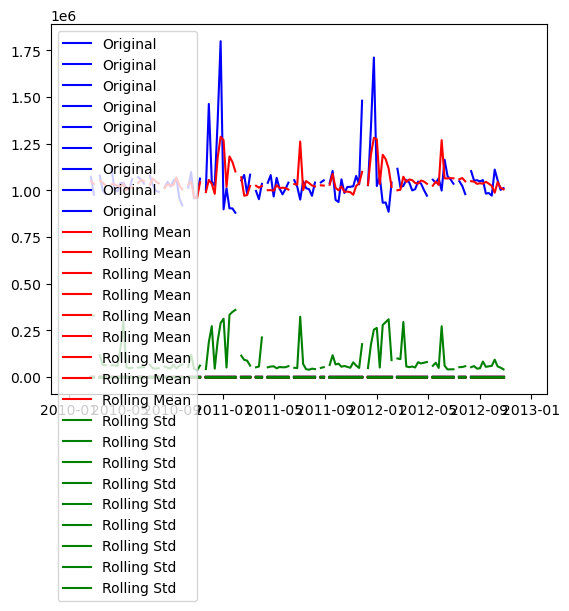

In [51]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
# Testing stationarity of store type a
test_stationarity(data)

In [52]:
data.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month             int64
Year              int64
dtype: object

In [53]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [54]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:198269.57354489036
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:193925.14445141162
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:180828.349143695
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:179942.29745178996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:180736.86286569064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:180233.90672537845
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:179969.07743502117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:179929.34705497036
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:193976.04726809153
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:192594.05622862914
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:178996.50187246536
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:177826.4230435642
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:191789.6796449052
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:191688.0732902044
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:177963.8569189764
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:177820.87463696618
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:174429.30849131767
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:174108.2188558547

In [55]:
model_sarima = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1378      0.030      4.569      0.000       0.079       0.197
ma.L1         -0.5596      0.026    -21.557      0.000      -0.611      -0.509
ma.S.L12      -0.9101      0.006   -147.729      0.000      -0.922      -0.898
sigma2      6.075e+10    2.4e-13   2.53e+23      0.000    6.07e+10    6.07e+10


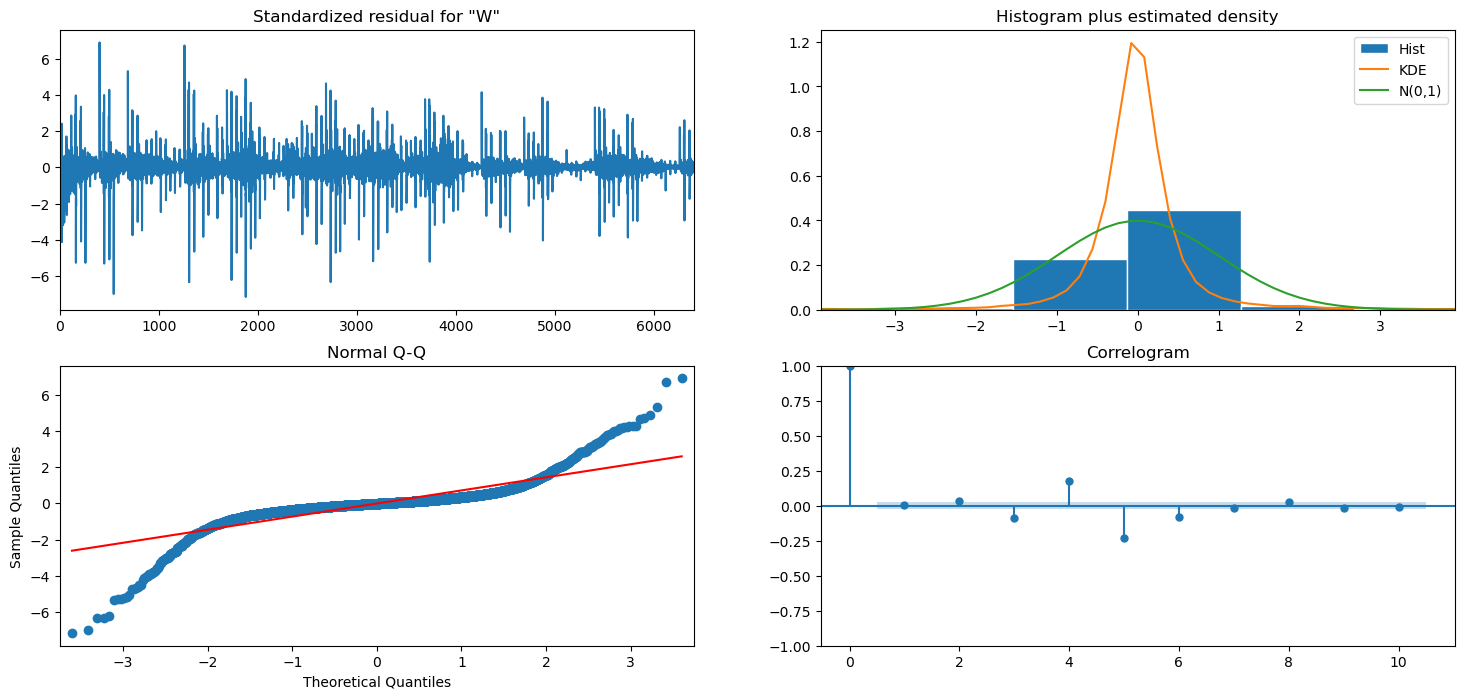

In [56]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

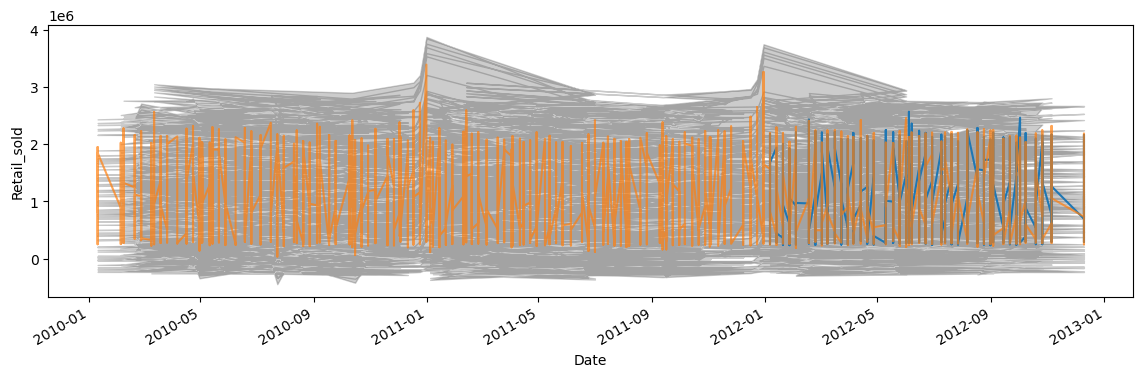

In [57]:
pred = results.get_prediction(start=pd.to_datetime('2012-10-19'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
#plt.legend()
plt.show()

In [58]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,12,2012


In [59]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-10-19':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 576105228010.62
The Root Mean Squared Error is 759015.96


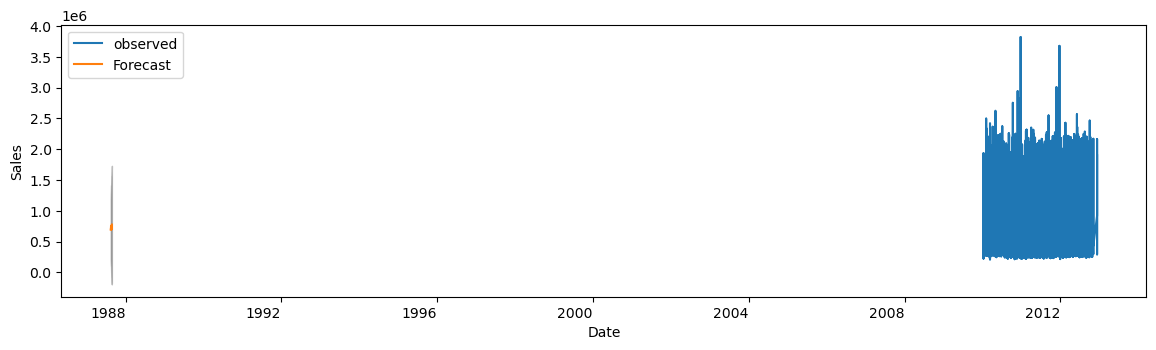

In [60]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

### Here I Forecasted the results for the next 12 weeks.

#### Project Completed.....